### **Lab 18**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("zalando-research/fashionmnist")

100%|██████████| 68.8M/68.8M [00:04<00:00, 17.4MB/s]

Extracting files...


In [2]:
train_df = pd.read_csv(path + '/fashion-mnist_train.csv')
test_df = pd.read_csv(path + '/fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_X = train_df.drop('label', axis=1) / 255.0
train_y = train_df['label'].values

test_X = train_df.drop('label', axis=1) / 255.0
test_y = train_df['label'].values

train_X = train_X.values.reshape(-1, 28, 28, 1)
test_X = test_X.values.reshape(-1, 28, 28, 1)

In [6]:
train_X.shape

(60000, 28, 28, 1)

In [7]:
train_y.shape

(60000,)

In [8]:
test_X.shape

(60000, 28, 28, 1)

In [9]:
test_y.shape

(60000,)

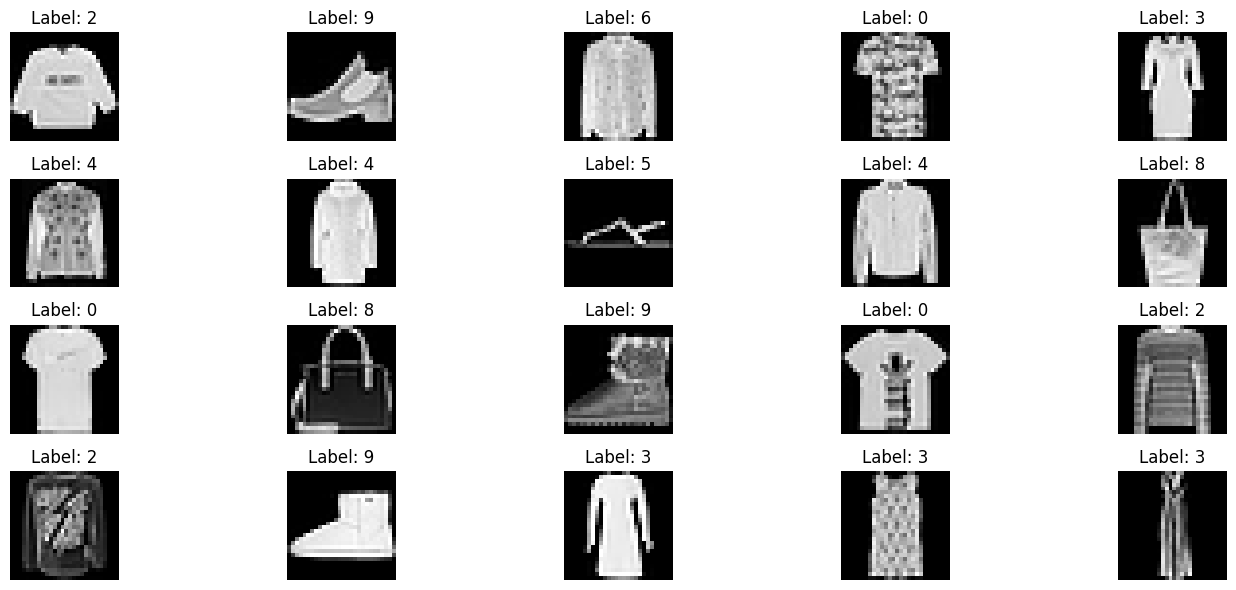

In [10]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
for i in range(20):
  ax = axes[i//5, i%5]
  ax.imshow(train_X[i], cmap='gray')
  ax.set_title(f"Label: {train_y[i]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

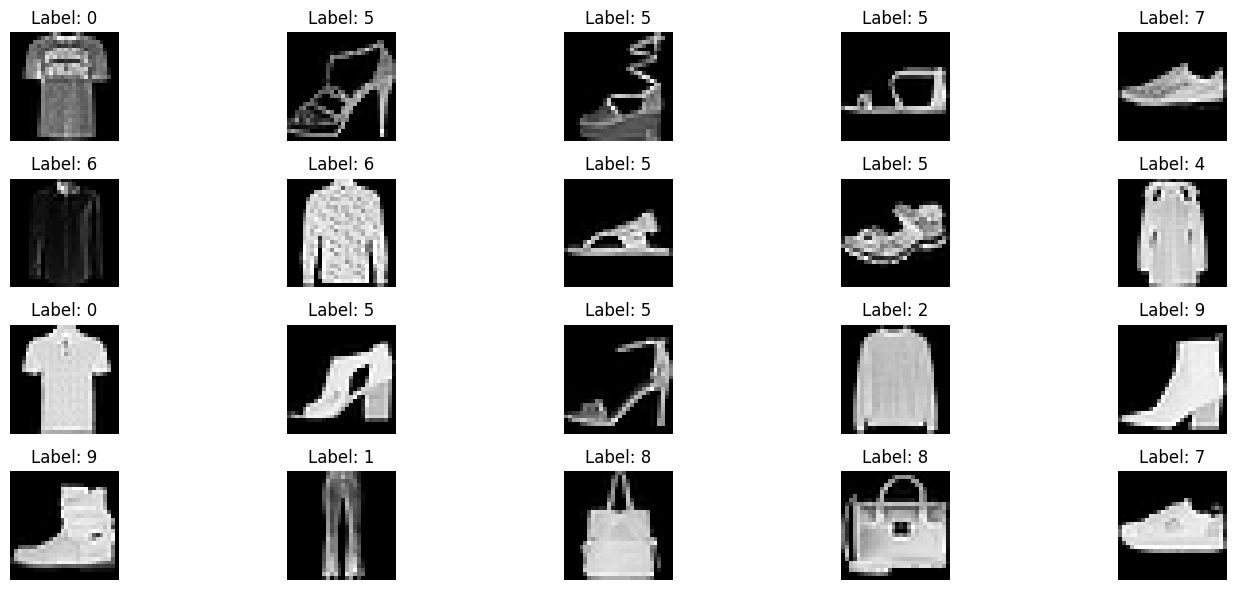

In [11]:
num_images = 20
start_index = train_X.shape[0] - num_images

fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i in range(num_images):
  ax = axes[i//5, i%5]
  ax.imshow(train_X[start_index + i], cmap='gray')
  ax.set_title(f"Label: {train_y[start_index + i]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

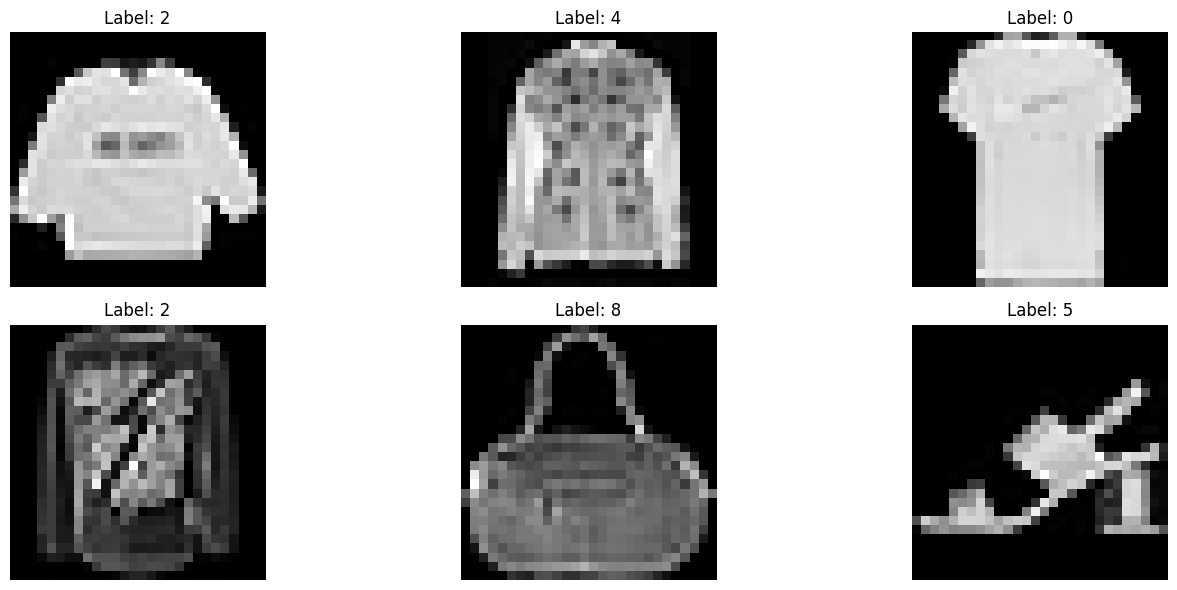

In [12]:
specific_indices = [0, 5, 10, 15, 20, 50]
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

for i, idx in enumerate(specific_indices):
  ax = axes[i//(len(specific_indices) // 2), i % (len(specific_indices)//2)]
  ax.imshow(train_X[idx], cmap='gray')
  ax.set_title(f"Label: {train_y[idx]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

In [13]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

In [15]:
augmented_images=[]
augmented_labels=[]

for X, y in zip(train_X, train_y):
  for _ in range(5):
    augmented_image = datagen.random_transform(X)
    augmented_images.append(augmented_image)
    augmented_labels.append(y)



In [16]:
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

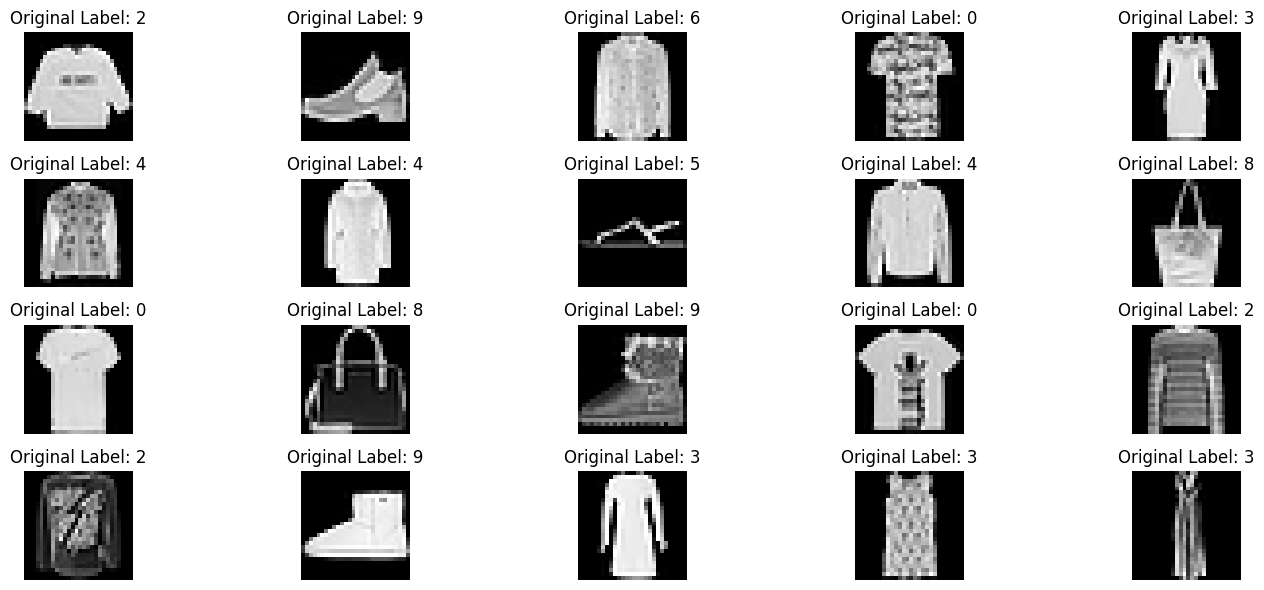

In [17]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))
for i in range(20):
  ax = axes[i//5, i%5]
  ax.imshow(train_X[i], cmap='gray')
  ax.set_title(f"Original Label: {train_y[i]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

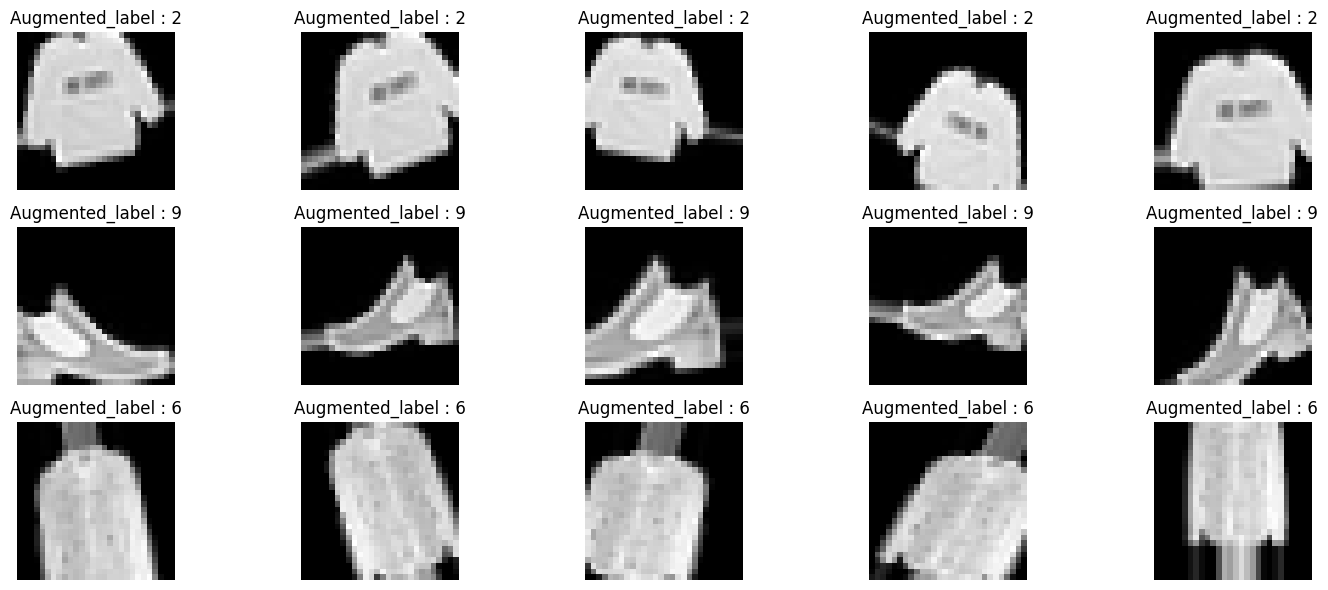

In [18]:
fig, axes = plt.subplots(3, 5, figsize=(15, 6))
for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(augmented_images[i], cmap='gray')
  ax.set_title(f"Augmented_label : {augmented_labels[i]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

In [20]:
# Combine original and augmented data
combined_images = np.concatenate((train_X, augmented_images), axis=0)
combined_labels = np.concatenate((train_y, augmented_labels), axis=0)

# Shuffle the combined data
from sklearn.utils import shuffle
combined_images, combined_labels = shuffle(combined_images, combined_labels, random_state=42)

In [25]:
from tensorflow.keras import layers

In [26]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(combined_images, combined_labels, epochs=20, validation_data=(test_X, test_y))

Epoch 1/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8264 - loss: 0.4695 - val_accuracy: 0.9039 - val_loss: 0.2583
Epoch 2/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8489 - loss: 0.4059 - val_accuracy: 0.9098 - val_loss: 0.2413
Epoch 3/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8615 - loss: 0.3705 - val_accuracy: 0.9203 - val_loss: 0.2137
Epoch 4/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8726 - loss: 0.3428 - val_accuracy: 0.9272 - val_loss: 0.1936
Epoch 5/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8804 - loss: 0.3184 - val_accuracy: 0.9346 - val_loss: 0.1784
Epoch 6/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8862 - loss: 0.3045 - val_accuracy: 0.9368 - val_loss: 0.1695
Epoch 7/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8911 - loss: 0.2880 - val_accuracy: 0.9387 - val_loss: 0.1622
Epoch 8/20
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 

In [30]:
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9649 - loss: 0.0946
Test Loss: 0.0972447544336319
Test Accuracy: 0.9635499715805054
